In [ ]:
'''--------
| Modules |
--------'''
import sklearn.neighbors as skn
import sklearn.model_selection as skts
import numpy as np

In [148]:
'''--------
| Options |
--------'''

trials = 5
plot_name = "./k5.png"

In [149]:
'''---------------
| Data Functions |
---------------'''
# Functions for importing and parsing data.

# Purpose:   To import and split data for training and for validation from a .csv file.
# Arguments: (1) Link to csv data in a form that can be accessed by
#                the "read_csv" function of pandas, url, or file with
#                path.
#            (2) Floating-point decimal from 0 to 1 representing how much
#                data should be used for training.
# Output:    Two np arrays. The first containing the data to be used in training and
#            the second the remainder of the data to be used for testing.
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    array = df.to_numpy()
    random.shuffle(array)
    return array

# Purpose:
# Arguments: (1) Nested, sliceable datastructure containing features with the label
#                as the final entry. Level-one caintaining all entries and level-two
#                containing the features and label.
# Output:    Two lists. One containing all class features in their original order and
#            a second containing all class labels in their original order.
def label_feature_split(data):
    feature_collection = []
    label_collection   = []
    for entry in data:
        feature_collection.append(entry[:-1])
        label_collection.append(entry[-1])
    feature_collection = [list(i) for i in feature_collection]
    return feature_collection, label_collection

In [150]:
'''---------------------------
| Model Generation an Testing|
---------------------------'''
# Generation and testing of varied knn k value.

import sklearn.neighbors as skn
import sklearn.model_selection as skts
import numpy as np

# Training data
training_set = []
# Test data
test_set = []
# Url to .csv containing data
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
data = load_dataset(url)
feature_collection, label_collection = label_feature_split(data)


# List containing tuples with two entries. First is n and second is the average
# score.
n_with_score = dict()
for test_n in range(0, trials):
    for n in range(1, 21):
        if n in n_with_score:
            pass
        else:
            n_with_score[n] = []
        feature_train, feature_test, label_train, label_test = skts.train_test_split(feature_collection, 
                                                                             label_collection, 
                                                                             test_size = 0.20)
        hood = skn.KNeighborsClassifier(n_neighbors = n)
        hood.fit(feature_train, label_train)
        score = hood.score(feature_test, label_test)
        n_with_score[n].append(score)
        
# Calculate average score
plot_data_x = []
plot_data_y = []
for key in n_with_score:
    n_with_score[key] = np.mean(np.array(n_with_score[key]))
    plot_data_x.append(int(key))
    plot_data_y.append(n_with_score[key])

In [140]:
print(len(label_train))
print(set(label_train))

120
{'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}


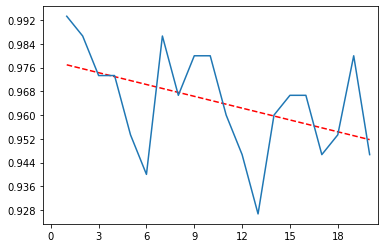

In [151]:
'''--------------
| Visualization |
--------------'''

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure()
ax = plt.axes()

# Be sure to only pick integer tick locations.
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

z = np.polyfit(plot_data_x, plot_data_y, 1)
p = np.poly1d(z)
ax.plot(plot_data_x, p(plot_data_x),"r--")
    
plt.xlim(-0.5, 20.5)
ax.plot(plot_data_x, plot_data_y);

plt.savefig(plot_name)

In [147]:
ls

iris.data  k1000.png  knn.ipynb
